## Noises Comparisons

Loading Libraries:

In [1]:
from matplotlib import pyplot as plt
from notebooks import loaders as load
import numpy as np
import torch

Short Explanation for Algorithms Naming Scheme:
- L2-TRPO: Delay TRPO with Deterministic Belief Module (L2-Loss)
- D-TRPO: Delay TRPO with Stochastic Belief Module (MAF)

Short Explanation for Noises Naming Scheme and Parameters:
- Uniform: Random Action Probability = 0.1
- Triangular: Left, Mode, Right = -2.0, 1.0, 2.0
- LogNormal: Shift, Mu, Sigma = 2.0, 0.0, 1.5
- NewLogNormal: Shift, Mu, Sigma = 1.0, 0.0, 1.0
- Quadratic: Shift, Scale, AB = 2.0, 4.0, 2.0
- NewQuadratic: Shift, Scale, AB = 2.0, 2.0, 2.0
- UShaped: Shift, Scale, AB = 0.5, 4.0, 0.5
- NewUShaped: Shift, Scale, AB = 0.5, 2.0, 0.5

## Data Loading & General Plot Settings

In [6]:
#L2TRPO and DTRPO without Noises
dtrpo_5_avg, dtrpo_5_std = load.stats_train(method='dtrpo', source='Results', test_type='Delay5', epoch=1000)
l2trpo_5_avg, l2trpo_5_std = load.stats_train(method='l2trpo', source='AISTATS', test_type='DET-Delay5')

# L2 TRPO Noises
l2trpo_uniform_avg, l2trpo_uniform_std = load.stats_train(method='l2trpo', source='Noises', test_type='Delay5-UniformNoise', epoch=500)
l2trpo_triangular_avg, l2trpo_triangular_std = load.stats_train(method='l2trpo', source='Noises', test_type='Delay5-TriangularNoise', epoch=500)
l2trpo_lognormal_avg, l2trpo_lognormal_std = load.stats_train(method='l2trpo', source='Noises', test_type='Delay5-LogNormalNoise', epoch=500)
l2trpo_newlognormal_avg, l2trpo_newlognormal_std = load.stats_train(method='l2trpo', source='Noises', test_type='Delay5-NewLogNormalNoise', epoch=500)
l2trpo_quadratic_avg, l2trpo_quadratic_std = load.stats_train(method='l2trpo', source='Noises', test_type='Delay5-QuadraticNoise', epoch=500)
l2trpo_newquadratic_avg, l2trpo_newquadratic_std = load.stats_train(method='l2trpo', source='Noises', test_type='Delay5-NewQuadraticNoise', epoch=500)
l2trpo_ushaped_avg, l2trpo_ushaped_std = load.stats_train(method='l2trpo', source='Noises', test_type='Delay5-UShapedNoise', epoch=500)
l2trpo_newushaped_avg, l2trpo_newushaped_std = load.stats_train(method='l2trpo', source='Noises', test_type='Delay5-NewUShapedNoise', epoch=500)

# DTRPO HiddenDim=4
dtrpo_uniform4_avg, dtrpo_uniform4_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-UniformNoise', epoch=1000)
dtrpo_triangular4_avg, dtrpo_triangular4_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-TriangularNoise', epoch=1000)
dtrpo_lognormal4_avg, dtrpo_lognormal4_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-LogNormalNoise', epoch=1000)
dtrpo_quadratic4_avg, dtrpo_quadratic4_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-QuadraticNoise', epoch=1000)
dtrpo_ushaped4_avg, dtrpo_ushaped4_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-UShapedNoise', epoch=1000)

# DTRPO HiddenDim=8
dtrpo_uniform8_avg, dtrpo_uniform8_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-UniformNoise8', epoch=1000)
dtrpo_triangular8_avg, dtrpo_triangular8_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-TriangularNoise8', epoch=1000)
dtrpo_lognormal8_avg, dtrpo_lognormal8_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-LogNormalNoise8', epoch=1000)
dtrpo_newlognormal8_avg, dtrpo_newlognormal8_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-NewLogNormalNoise8', epoch=1000)
dtrpo_quadratic8_avg, dtrpo_quadratic8_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-QuadraticNoise8', epoch=1000)
dtrpo_newquadratic8_avg, dtrpo_newquadratic8_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-NewQuadraticNoise8', epoch=1000)
dtrpo_ushaped8_avg, dtrpo_ushaped8_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-UShapedNoise8', epoch=1000)
dtrpo_newushaped8_avg, dtrpo_newushaped8_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-NewUShapedNoise8', epoch=1000)

In [5]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
plt.rc('axes', titlesize='x-large')
plt.rc('axes', labelsize='large')

## Deterministic Belief Module: Old Noises

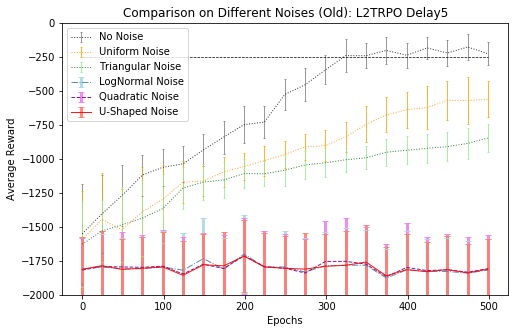

In [28]:
# Plot Range Settings
episode_num = len(l2trpo_uniform_avg)
epochs = np.arange(-1, episode_num, 25)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, l2trpo_5_avg[epochs], yerr=l2trpo_5_std[epochs], color='black', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='grey', elinewidth=1, capsize=1, label='No Noise')
ax.errorbar(epochs, l2trpo_uniform_avg[epochs], yerr=l2trpo_uniform_std[epochs], color='darkorange', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='orange', elinewidth=1, capsize=1, label='Uniform Noise')
ax.errorbar(epochs, l2trpo_triangular_avg[epochs], yerr=l2trpo_triangular_std[epochs], color='darkgreen', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightgreen', elinewidth=1, capsize=1, label='Triangular Noise')
ax.errorbar(epochs, l2trpo_lognormal_avg[epochs], yerr=l2trpo_lognormal_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightblue', elinewidth=3, capsize=3, label='LogNormal Noise')
ax.errorbar(epochs, l2trpo_quadratic_avg[epochs], yerr=l2trpo_quadratic_std[epochs], color='purple', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='violet', elinewidth=3, capsize=3, label='Quadratic Noise')
ax.errorbar(epochs, l2trpo_ushaped_avg[epochs], yerr=l2trpo_ushaped_std[epochs], color='red', ls='solid',
            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=3, capsize=3, label='U-Shaped Noise')

# Plot Decoration Settings
goal_line = torch.as_tensor([-250] * episode_num, dtype=torch.float32)
ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 501, 100))
ax.set_title('Comparison on Different Noises (Old): L2TRPO Delay5')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
#fig.savefig('./plots/Noises_L2TRPO_Old.png', dpi=1000)

### Stochastic Belief Module (Hidden Dim=4): Old Noises


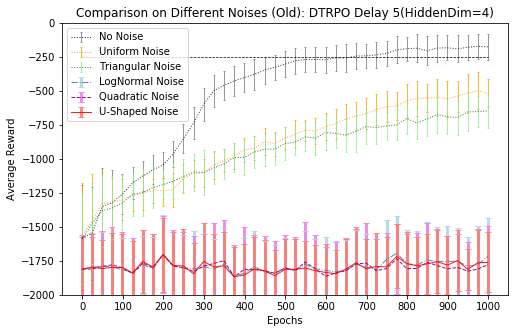

In [29]:
# Plot Range Settings
episode_num = len(dtrpo_uniform4_avg)
epochs = np.arange(-1, episode_num, 25)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, dtrpo_5_avg[epochs], yerr=dtrpo_5_std[epochs], color='black', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='grey', elinewidth=1, capsize=1, label='No Noise')
ax.errorbar(epochs, dtrpo_uniform4_avg[epochs], yerr=dtrpo_uniform4_std[epochs], color='darkorange', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='orange', elinewidth=1, capsize=1, label='Uniform Noise')
ax.errorbar(epochs, dtrpo_triangular4_avg[epochs], yerr=dtrpo_triangular4_std[epochs], color='darkgreen', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightgreen', elinewidth=1, capsize=1, label='Triangular Noise')
ax.errorbar(epochs, dtrpo_lognormal4_avg[epochs], yerr=dtrpo_lognormal4_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightblue', elinewidth=3, capsize=3, label='LogNormal Noise')
ax.errorbar(epochs, dtrpo_quadratic4_avg[epochs], yerr=dtrpo_quadratic4_std[epochs], color='purple', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='violet', elinewidth=3, capsize=3, label='Quadratic Noise')
ax.errorbar(epochs, dtrpo_ushaped4_avg[epochs], yerr=dtrpo_ushaped4_std[epochs], color='red', ls='solid',
            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=3, capsize=3, label='U-Shaped Noise')

# Plot Decoration Settings
goal_line = torch.as_tensor([-250] * episode_num, dtype=torch.float32)
ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 1001, 100))
ax.set_title('Comparison on Different Noises (Old): DTRPO Delay 5(HiddenDim=4)')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
#fig.savefig('./plots/Noises_DTRPO_4_Old.png', dpi=1000)

### Stochastic Belief Module (HiddenDim=8): Old Noises


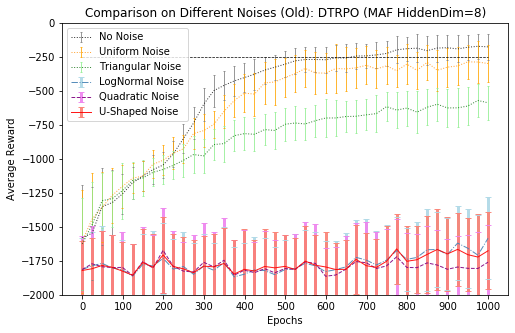

In [30]:
# Plot Range Settings
episode_num = len(dtrpo_uniform8_avg)
epochs = np.arange(-1, episode_num, 25)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, dtrpo_5_avg[epochs], yerr=dtrpo_5_std[epochs], color='black', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='grey', elinewidth=1, capsize=1, label='No Noise')
ax.errorbar(epochs, dtrpo_uniform8_avg[epochs], yerr=dtrpo_uniform8_std[epochs], color='darkorange', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='orange', elinewidth=1, capsize=1, label='Uniform Noise')
ax.errorbar(epochs, dtrpo_triangular8_avg[epochs], yerr=dtrpo_triangular8_std[epochs], color='darkgreen', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightgreen', elinewidth=1, capsize=1, label='Triangular Noise')
ax.errorbar(epochs, dtrpo_lognormal8_avg[epochs], yerr=dtrpo_lognormal8_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightblue', elinewidth=3, capsize=3, label='LogNormal Noise')
ax.errorbar(epochs, dtrpo_quadratic8_avg[epochs], yerr=dtrpo_quadratic8_std[epochs], color='purple', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='violet', elinewidth=3, capsize=3, label='Quadratic Noise')
ax.errorbar(epochs, dtrpo_ushaped8_avg[epochs], yerr=dtrpo_ushaped8_std[epochs], color='red', ls='solid',
            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=3, capsize=3, label='U-Shaped Noise')

# Plot Decoration Settings
goal_line = torch.as_tensor([-250] * episode_num, dtype=torch.float32)
ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 1001, 100))
ax.set_title('Comparison on Different Noises (Old): DTRPO (MAF HiddenDim=8)')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./plots/Noises_DTRPO_8_Old.png', dpi=1000)

### Deterministic Belief Module: New Noises

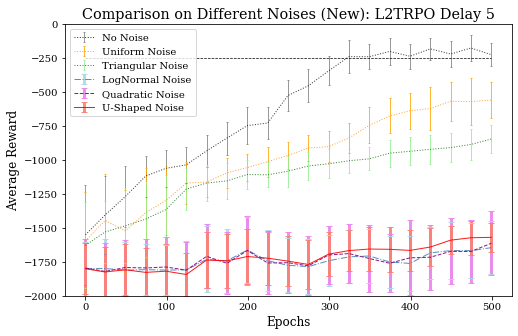

In [8]:
# Plot Range Settings
episode_num = len(l2trpo_uniform_avg)
epochs = np.arange(-1, episode_num, 25)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, l2trpo_5_avg[epochs], yerr=l2trpo_5_std[epochs], color='black', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='grey', elinewidth=1, capsize=1, label='No Noise')
ax.errorbar(epochs, l2trpo_uniform_avg[epochs], yerr=l2trpo_uniform_std[epochs], color='darkorange', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='orange', elinewidth=1, capsize=1, label='Uniform Noise')
ax.errorbar(epochs, l2trpo_triangular_avg[epochs], yerr=l2trpo_triangular_std[epochs], color='darkgreen', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightgreen', elinewidth=1, capsize=1, label='Triangular Noise')
ax.errorbar(epochs, l2trpo_newlognormal_avg[epochs], yerr=l2trpo_newlognormal_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightblue', elinewidth=3, capsize=3, label='LogNormal Noise')
ax.errorbar(epochs, l2trpo_newquadratic_avg[epochs], yerr=l2trpo_newquadratic_std[epochs], color='purple', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='violet', elinewidth=3, capsize=3, label='Quadratic Noise')
ax.errorbar(epochs, l2trpo_newushaped_avg[epochs], yerr=l2trpo_newushaped_std[epochs], color='red', ls='solid',
            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=3, capsize=3, label='U-Shaped Noise')

# Plot Decoration Settings
goal_line = torch.as_tensor([-250] * episode_num, dtype=torch.float32)
ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 501, 100))
ax.set_title('Comparison on Different Noises (New): L2TRPO Delay 5')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./plots/Noises_L2TRPO_New.png', dpi=1000)


### Stochastic Belief Module (HiddenDim=8): New Noises


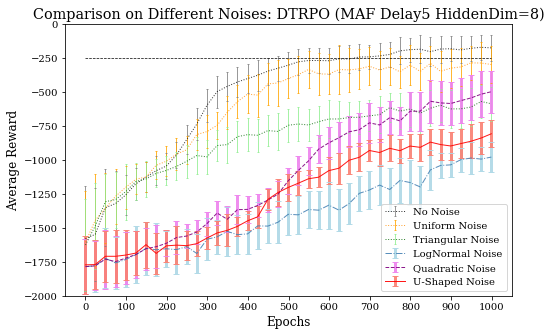

In [9]:
# Plot Range Settings
episode_num = len(dtrpo_uniform8_avg)
epochs = np.arange(-1, episode_num, 25)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, dtrpo_5_avg[epochs], yerr=dtrpo_5_std[epochs], color='black', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='grey', elinewidth=1, capsize=1, label='No Noise')
ax.errorbar(epochs, dtrpo_uniform8_avg[epochs], yerr=dtrpo_uniform8_std[epochs], color='darkorange', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='orange', elinewidth=1, capsize=1, label='Uniform Noise')
ax.errorbar(epochs, dtrpo_triangular8_avg[epochs], yerr=dtrpo_triangular8_std[epochs], color='darkgreen', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightgreen', elinewidth=1, capsize=1, label='Triangular Noise')
ax.errorbar(epochs, dtrpo_newlognormal8_avg[epochs], yerr=dtrpo_newlognormal8_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightblue', elinewidth=3, capsize=3, label='LogNormal Noise')
ax.errorbar(epochs, dtrpo_newquadratic8_avg[epochs], yerr=dtrpo_newquadratic8_std[epochs], color='purple', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='violet', elinewidth=3, capsize=3, label='Quadratic Noise')
ax.errorbar(epochs, dtrpo_newushaped8_avg[epochs], yerr=dtrpo_newushaped8_std[epochs], color='red', ls='solid',
            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=3, capsize=3, label='U-Shaped Noise')

# Plot Decoration Settings
goal_line = torch.as_tensor([-250] * episode_num, dtype=torch.float32)
ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 1001, 100))
ax.set_title('Comparison on Different Noises: DTRPO (MAF Delay5 HiddenDim=8)')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./plots/Noises_DTRPO_8_New.png', dpi=1000)